In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import random
from mpl_toolkits.mplot3d import Axes3D



In [ ]:
data = pd.read_csv('YourData.csv')

In [ ]:
print(data.info())
# print(data.describe())
# print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53087 entries, 0 to 53086
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   number           53087 non-null  int64  
 1   relaxation       53087 non-null  int64  
 2   dental caries    53087 non-null  int64  
 3   height(cm)       53087 non-null  int64  
 4   weight(kg)       53087 non-null  int64  
 5   age              53087 non-null  int64  
 6   Urine protein    53087 non-null  int64  
 7   ALT              53087 non-null  int64  
 8   LDL              53086 non-null  float64
 9   AST              53086 non-null  float64
 10  eyesight(right)  53086 non-null  float64
 11  smoking          53086 non-null  float64
dtypes: float64(4), int64(8)
memory usage: 4.9 MB
None


# UniVariate Analysis

## Histograms

Index(['relaxation', 'dental caries', 'height(cm)', 'weight(kg)', 'age',
       'Urine protein', 'ALT', 'LDL', 'AST', 'eyesight(right)', 'smoking'],
      dtype='object')


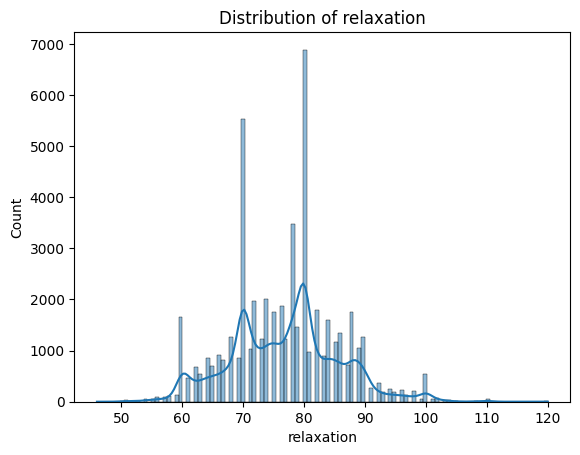

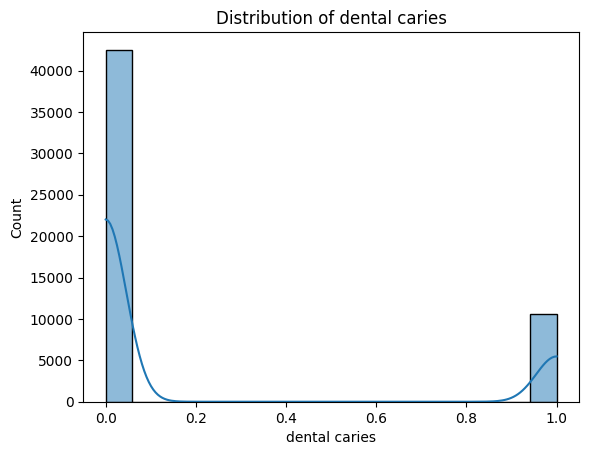

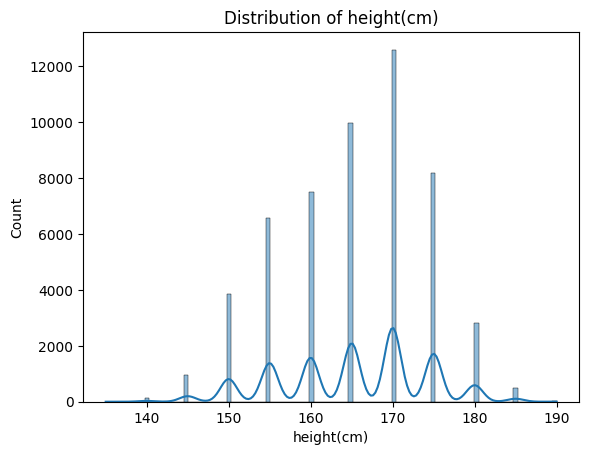

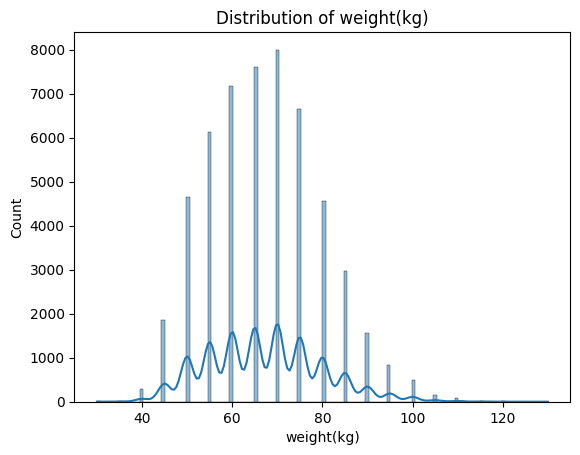

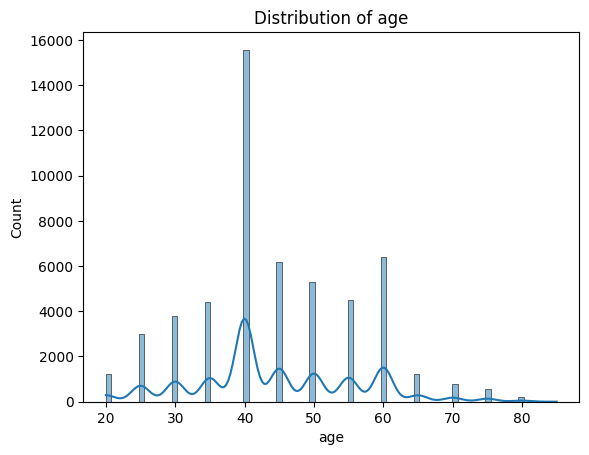

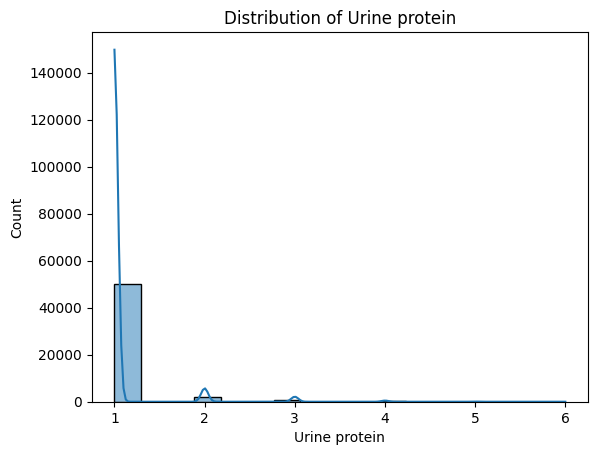

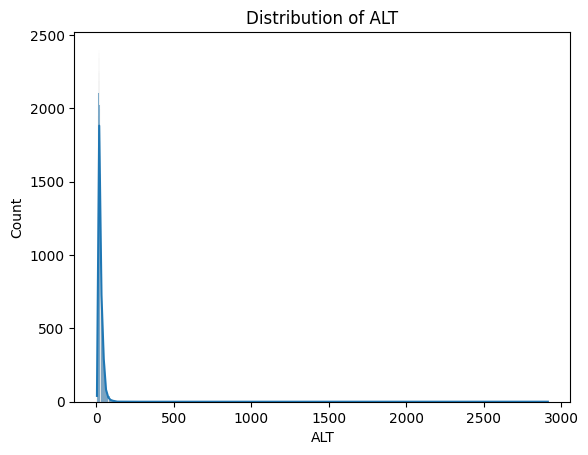

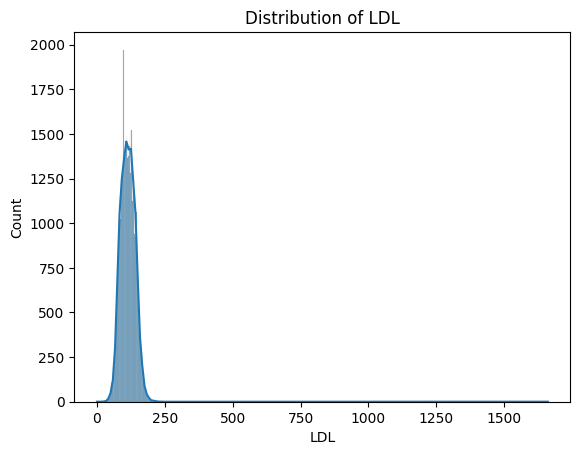

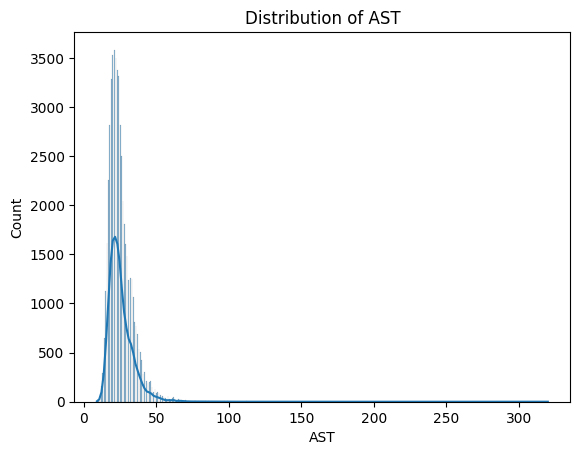

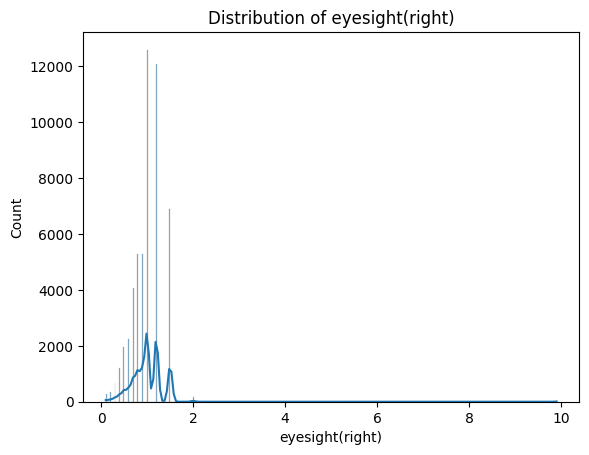

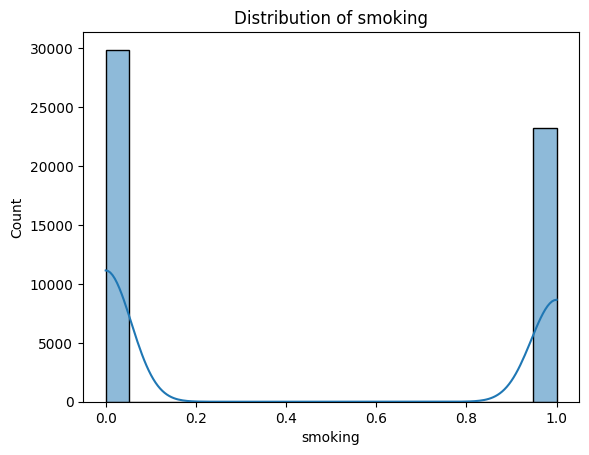

In [ ]:
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
# numerical_features = numerical_features.drop('id')
if 'id' in numerical_features:
    numerical_features = numerical_features.drop('id')
if ('number') in numerical_features:
    numerical_features = numerical_features.drop('number')
print(numerical_features)
for col in numerical_features:
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

## Pie Chart & Count Plot for Smokers and Non Smokers

smoking
0.0    29880
1.0    23206
Name: count, dtype: int64


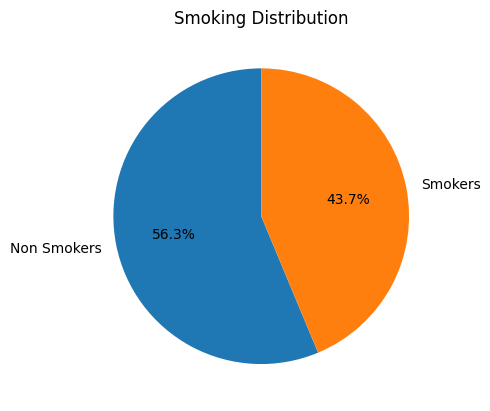

In [ ]:
smoking_count = data['smoking'].value_counts()
print(smoking_count)
labels = ['Non Smokers', 'Smokers']

plt.pie(smoking_count, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Smoking Distribution')
plt.show()

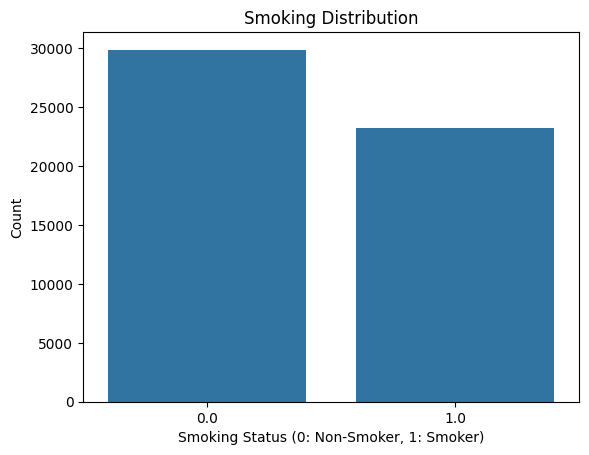

In [ ]:
sns.countplot(x = 'smoking' , data = data)
plt.title('Smoking Distribution')
plt.xlabel('Smoking Status (0: Non-Smoker, 1: Smoker)')
plt.ylabel('Count')
plt.show()

## Statistics

In [ ]:
for col in numerical_features:
    print(f"Statistics for {col}:")
    print(f"- Mean: {data[col].mean():.2f}")
    print(f"- Median: {data[col].median():.2f}")
    print(f"- Std Dev: {data[col].std():.2f}")
    print(f"- Min: {data[col].min()}, Max: {data[col].max()}")
    print(f"- Skewness: {data[col].skew():.2f}")
    print(f"- Kurtosis: {data[col].kurt():.2f}")
    print("-" * 50)


Statistics for relaxation:
- Mean: 76.87
- Median: 78.00
- Std Dev: 8.98
- Min: 46, Max: 120
- Skewness: 0.18
- Kurtosis: 0.14
--------------------------------------------------
Statistics for dental caries:
- Mean: 0.20
- Median: 0.00
- Std Dev: 0.40
- Min: 0, Max: 1
- Skewness: 1.51
- Kurtosis: 0.27
--------------------------------------------------
Statistics for height(cm):
- Mean: 165.26
- Median: 165.00
- Std Dev: 8.85
- Min: 135, Max: 190
- Skewness: -0.27
- Kurtosis: -0.54
--------------------------------------------------
Statistics for weight(kg):
- Mean: 67.17
- Median: 65.00
- Std Dev: 12.64
- Min: 30, Max: 130
- Skewness: 0.37
- Kurtosis: -0.03
--------------------------------------------------
Statistics for age:
- Mean: 44.36
- Median: 40.00
- Std Dev: 11.79
- Min: 20, Max: 85
- Skewness: 0.29
- Kurtosis: -0.17
--------------------------------------------------
Statistics for Urine protein:
- Mean: 1.07
- Median: 1.00
- Std Dev: 0.35
- Min: 1, Max: 6
- Skewness: 5.57
- K

# Bivariate Analysis


## Box Plots

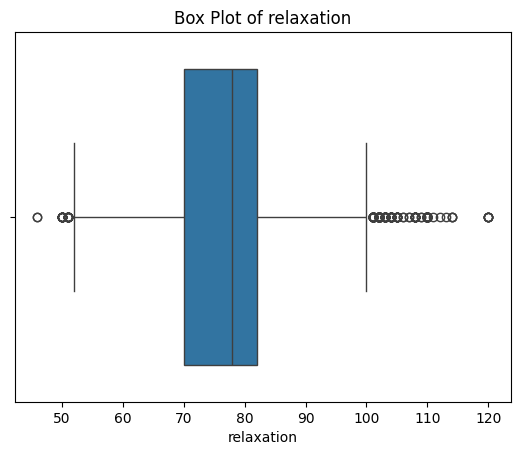

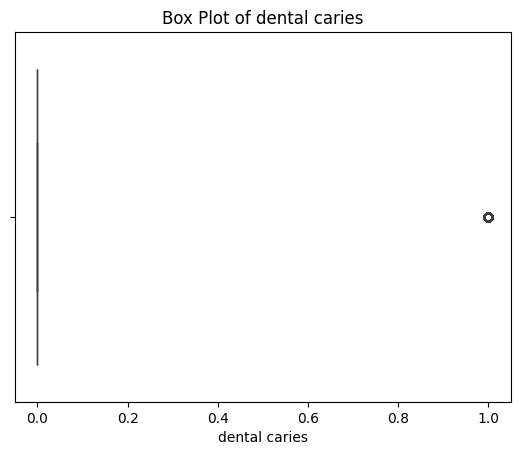

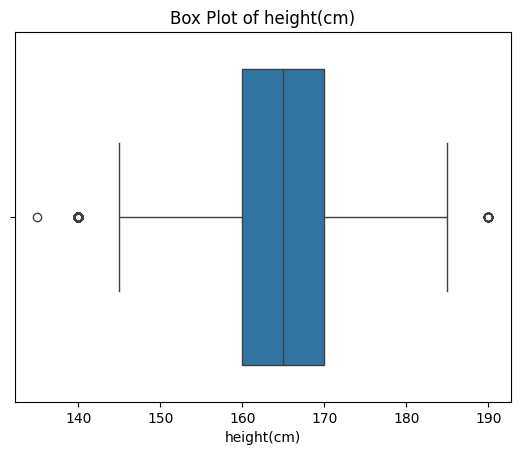

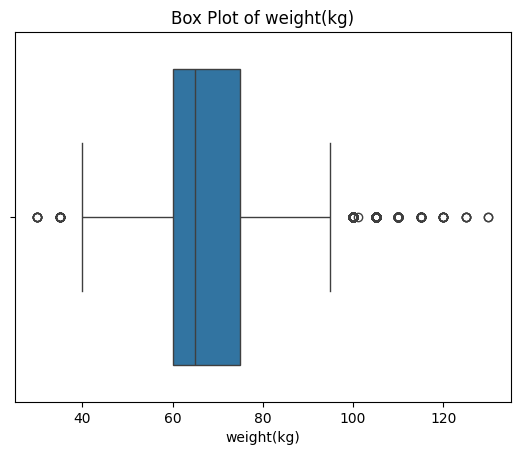

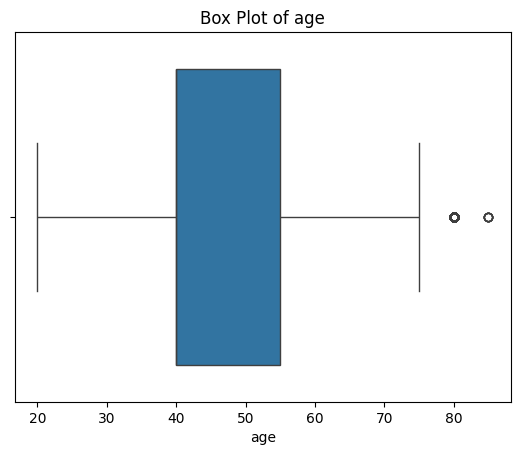

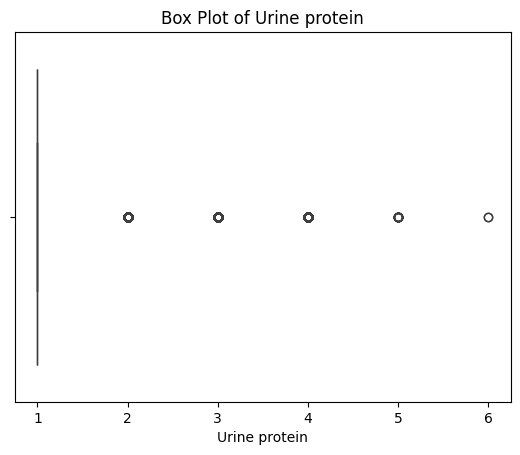

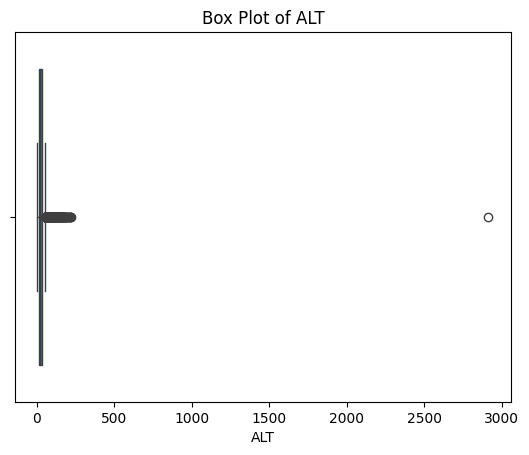

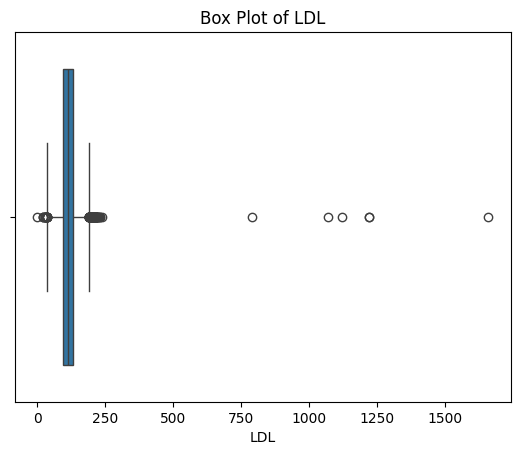

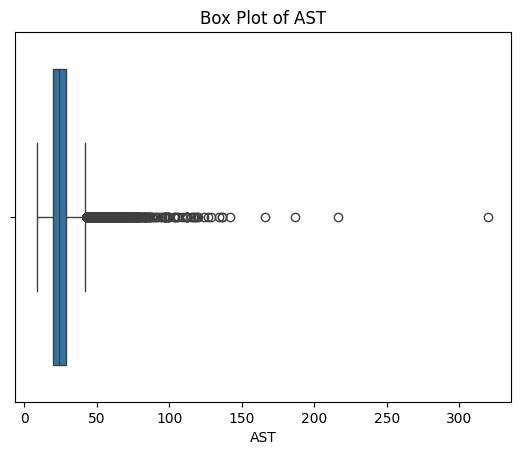

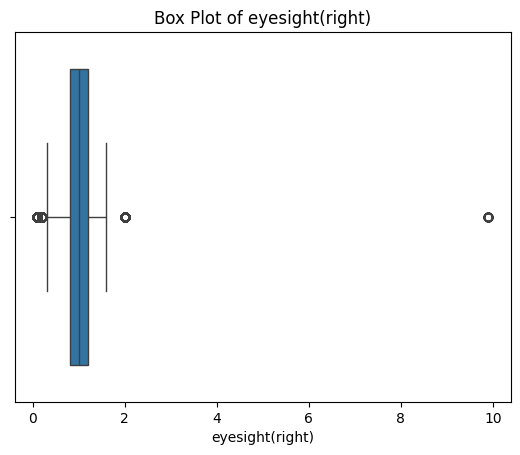

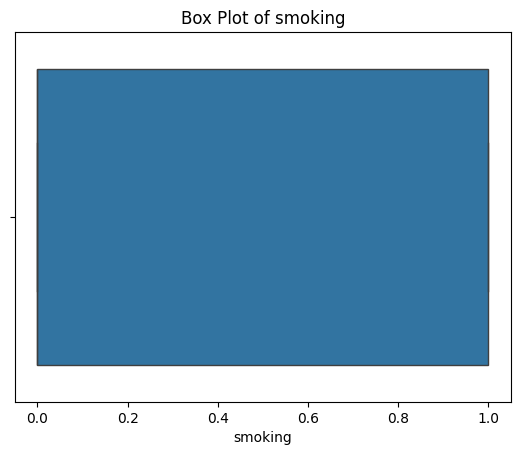

In [ ]:
for col in numerical_features:
    sns.boxplot(x=data[col])
    plt.title(f"Box Plot of {col}")
    plt.show()


## Correlation Matrix

In [ ]:
print("Correlation Matrix:")
correlation_matrix = data[numerical_features].corr()
print(correlation_matrix)

Correlation Matrix:
                 relaxation  dental caries  height(cm)  weight(kg)       age  \
relaxation         1.000000       0.019763    0.112906    0.266807  0.065150   
dental caries      0.019763       1.000000    0.100307    0.089868 -0.121286   
height(cm)         0.112906       0.100307    1.000000    0.689537 -0.490918   
weight(kg)         0.266807       0.089868    0.689537    1.000000 -0.336385   
age                0.065150      -0.121286   -0.490918   -0.336385  1.000000   
Urine protein     -0.021279      -0.016530   -0.009172   -0.027197 -0.009240   
ALT                0.114740       0.023376    0.204324    0.341923 -0.115459   
LDL                0.070200      -0.018551   -0.081211    0.055853  0.106816   
AST                0.096682      -0.005815    0.062094    0.171636  0.040005   
eyesight(right)    0.019116       0.025105    0.219355    0.167430 -0.273363   
smoking            0.107189       0.107548    0.446642    0.356299 -0.207275   

                 Ur

## HeatMap

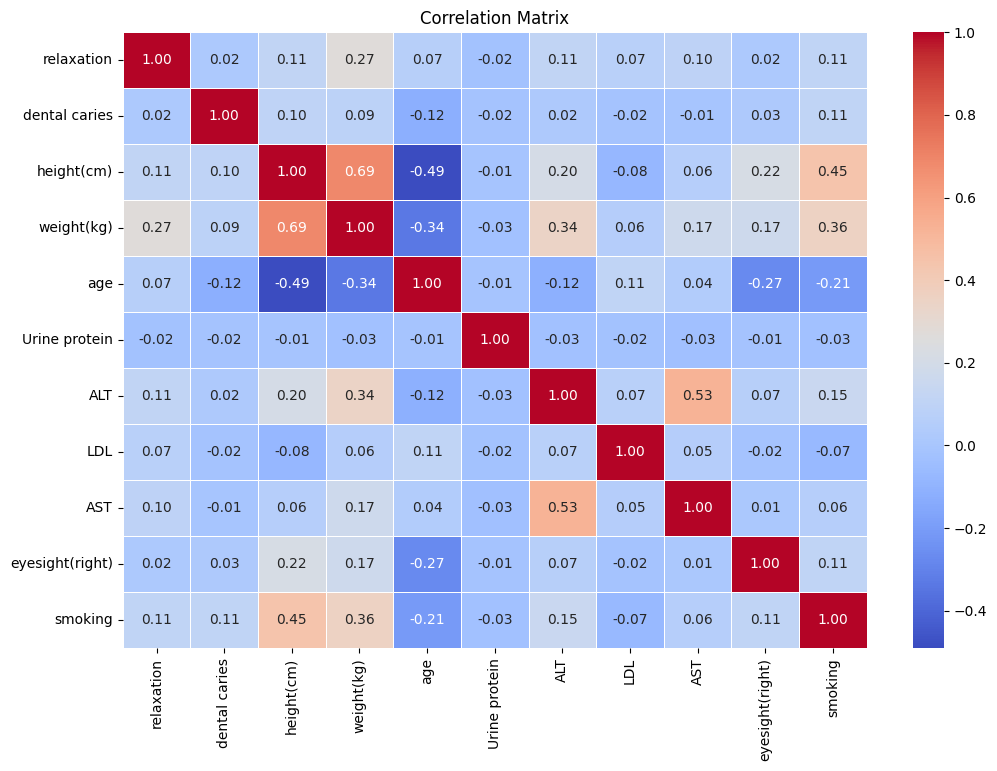

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

## Scatter Plot

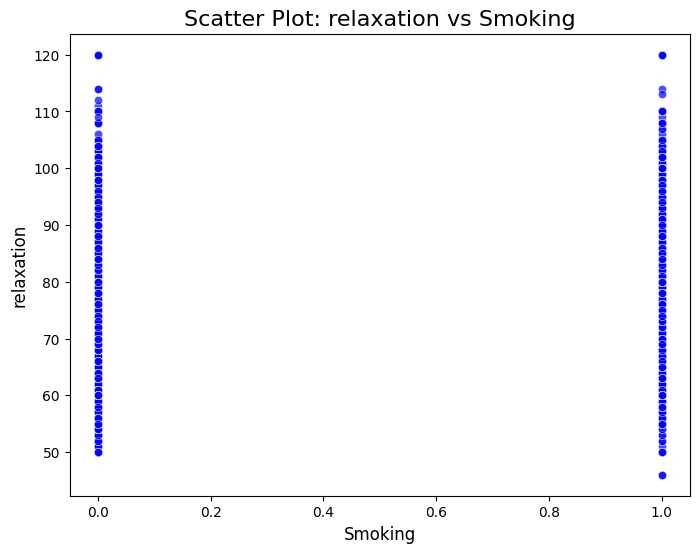

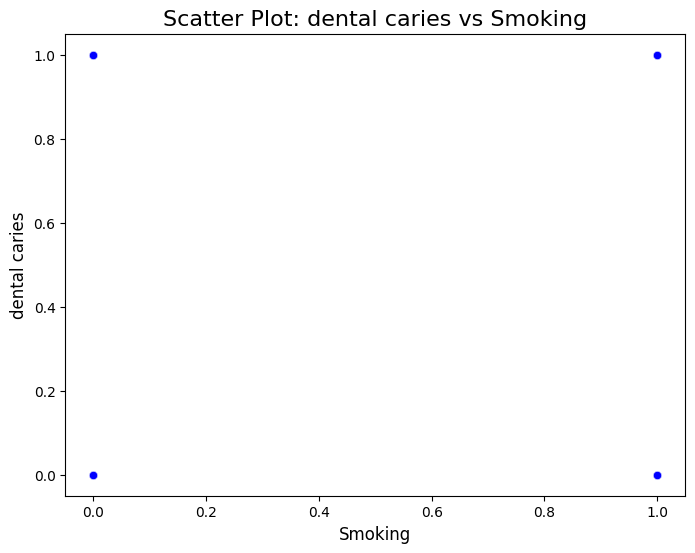

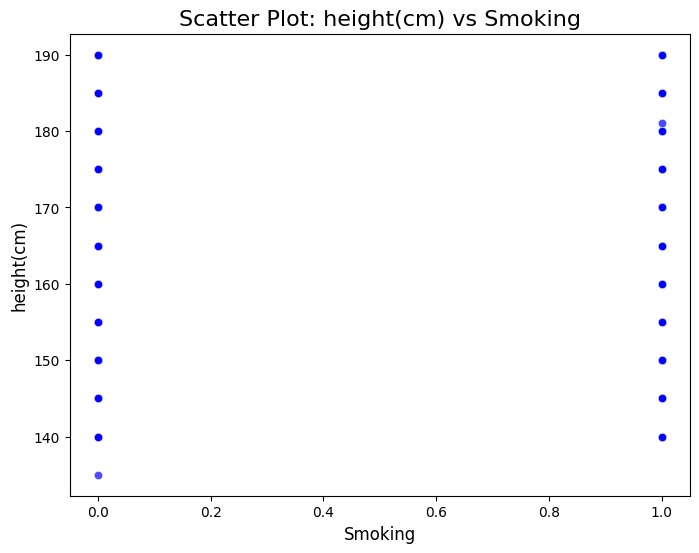

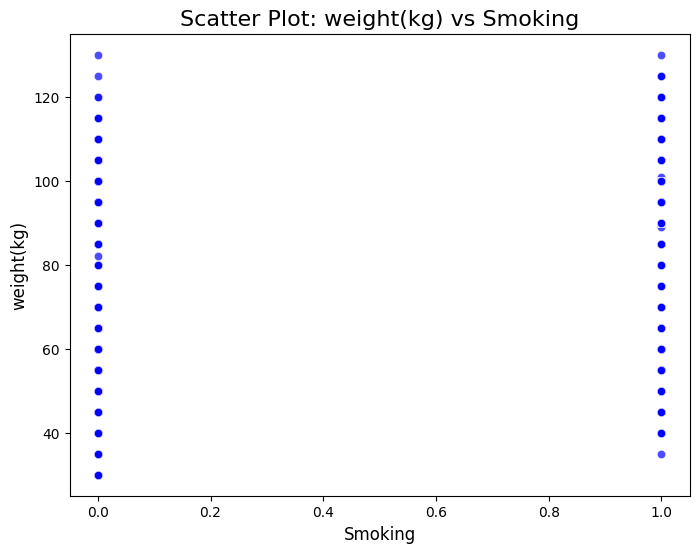

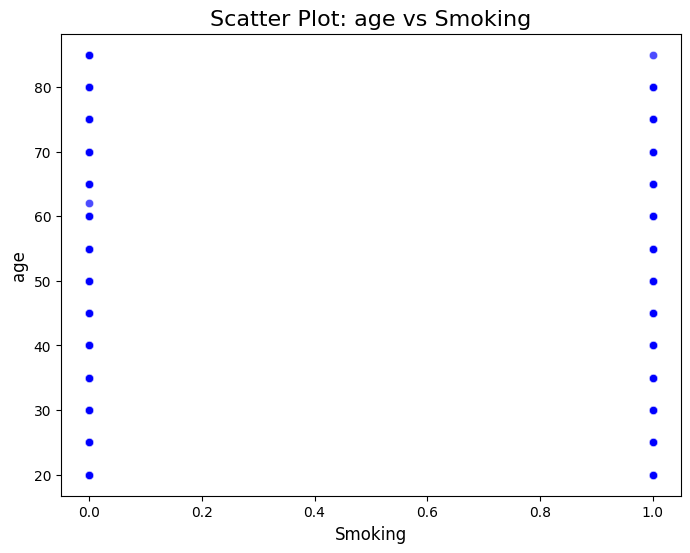

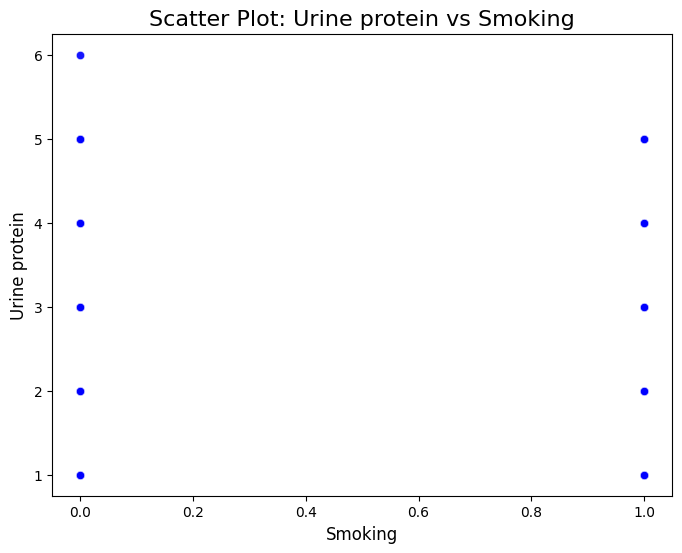

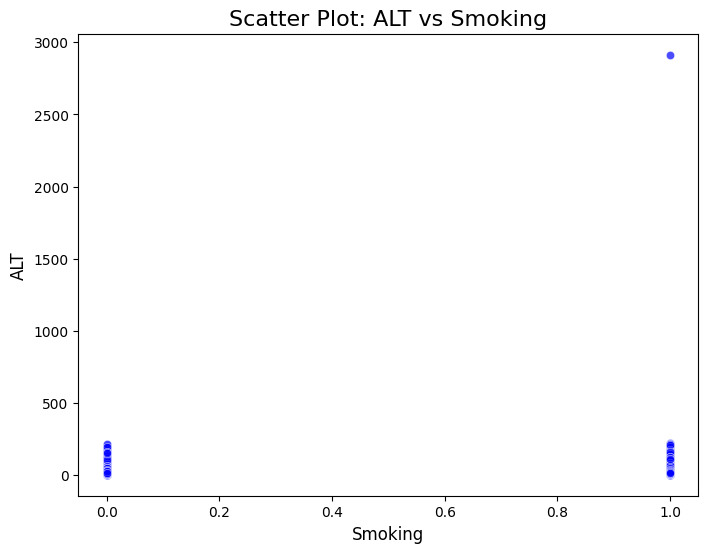

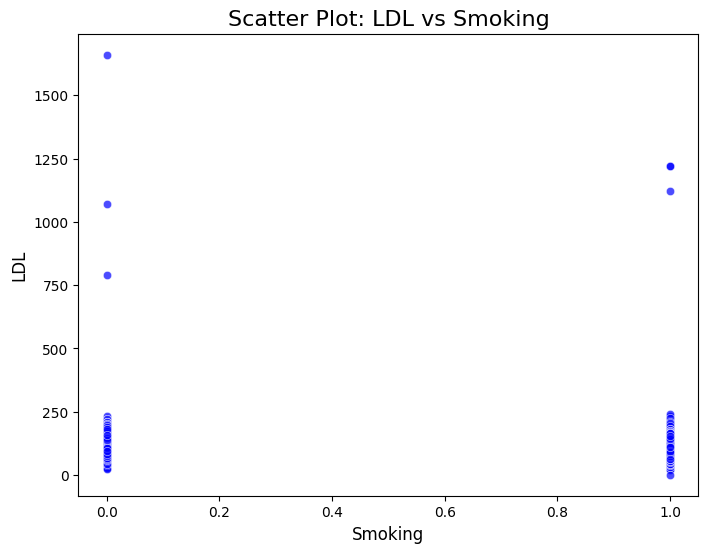

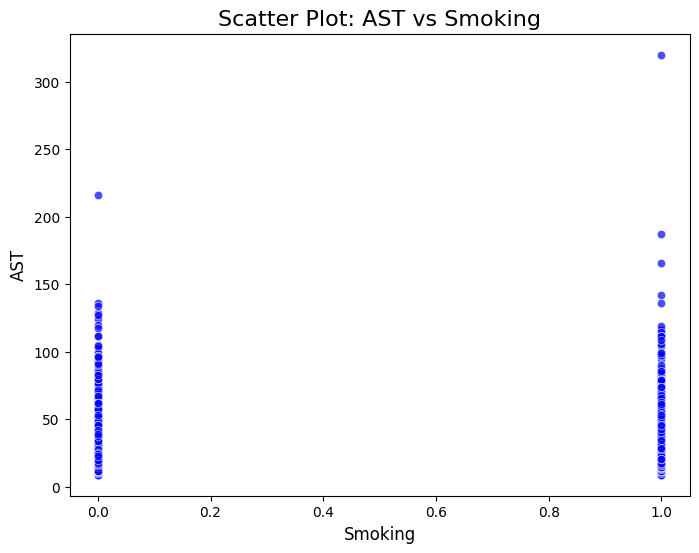

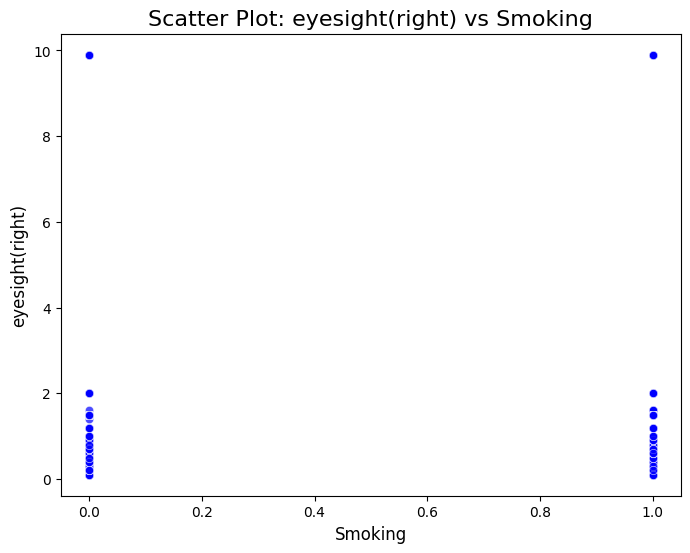

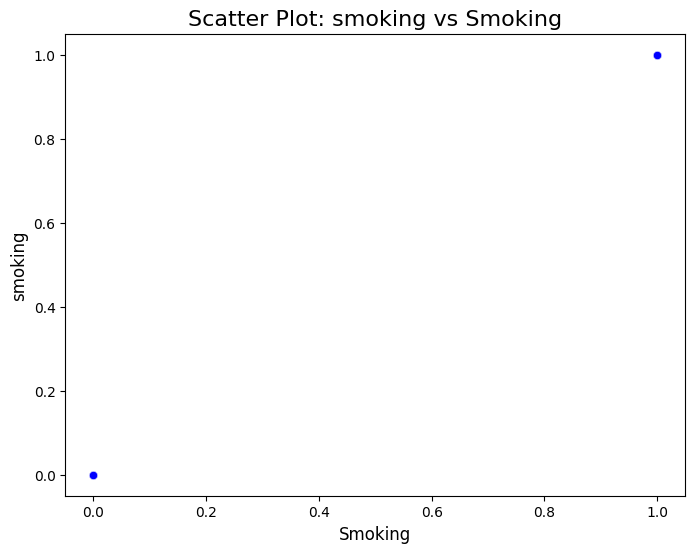

In [ ]:
# for i, col1 in enumerate(numerical_features):
#     for col2 in numerical_features[i+1:]:  # Avoid duplicates and self-pairing
#         plt.figure(figsize=(8, 6))
#         sns.scatterplot(x=data[col1], y=data[col2], color='blue', alpha=0.7)
#         plt.title(f"Scatter Plot: {col1} vs {col2}")
#         plt.xlabel(col1)
#         plt.ylabel(col2)
#         plt.show()



# Scatter plots: Plot smoking against each feature in numerical_features
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data['smoking'], y=data[feature], color='blue', alpha=0.7)
    plt.title(f"Scatter Plot: {feature} vs Smoking", fontsize=16)
    plt.xlabel("Smoking", fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.show()


## Joint Plot

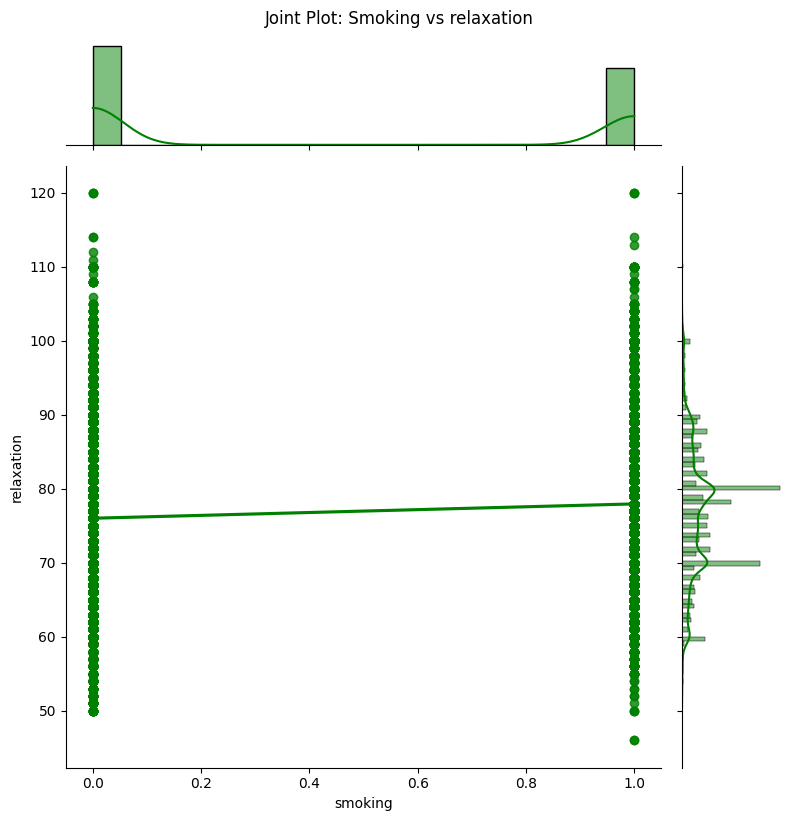

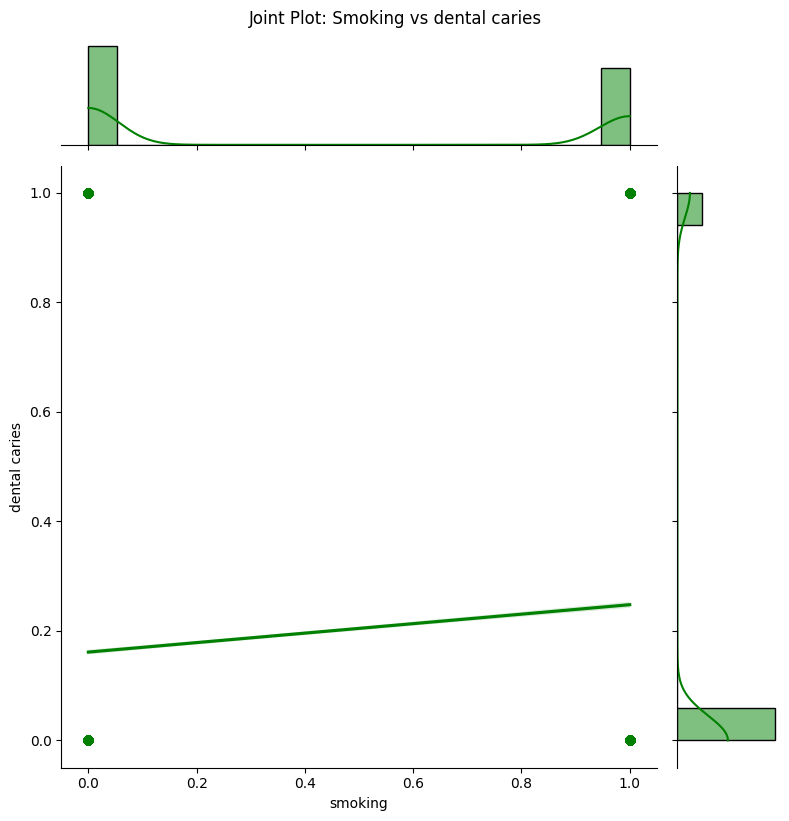

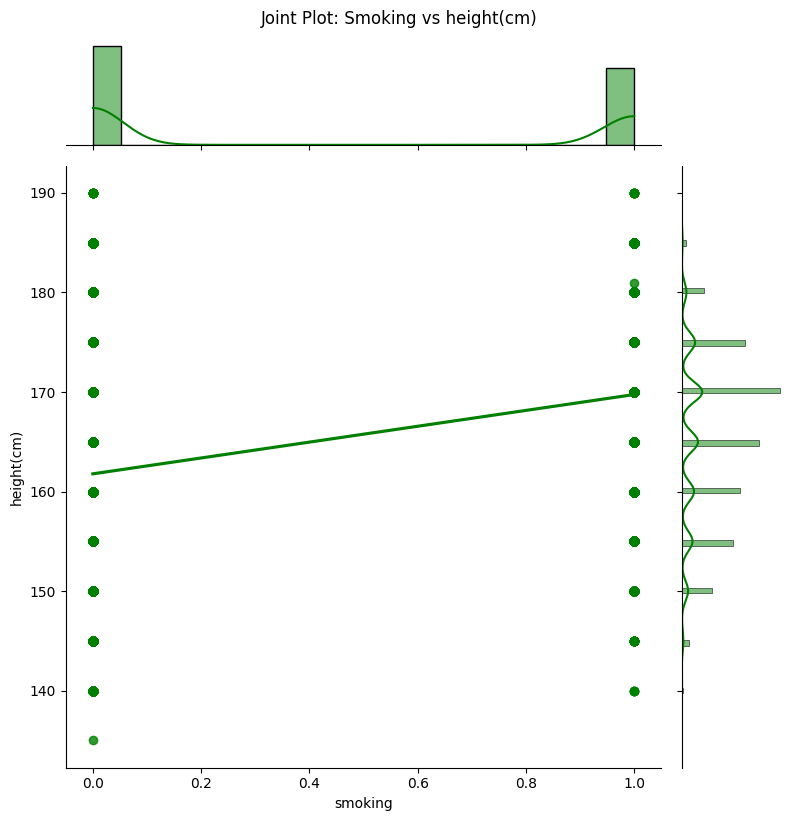

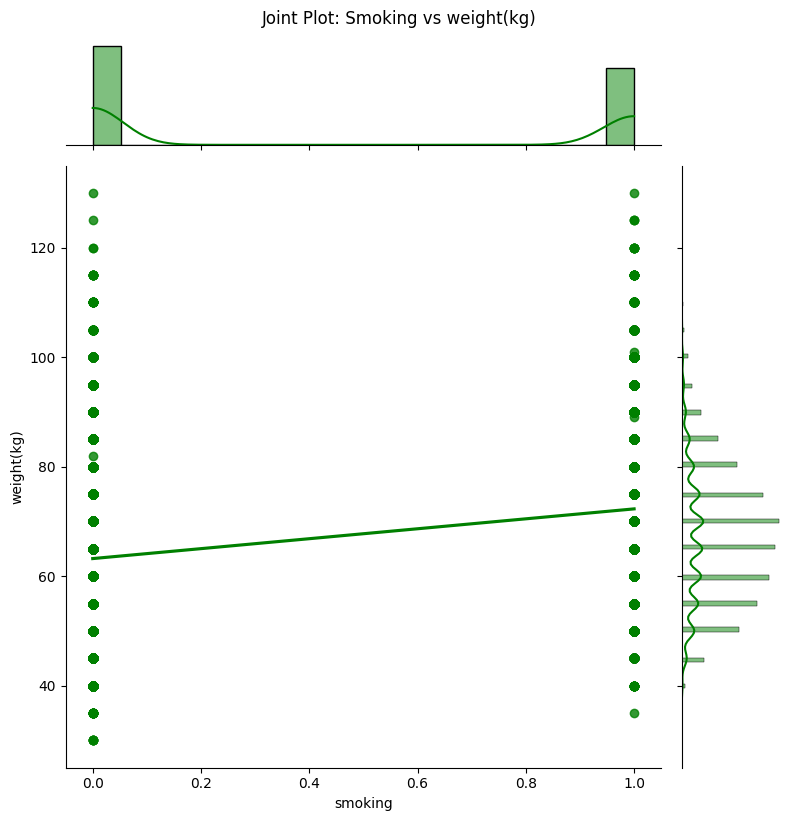

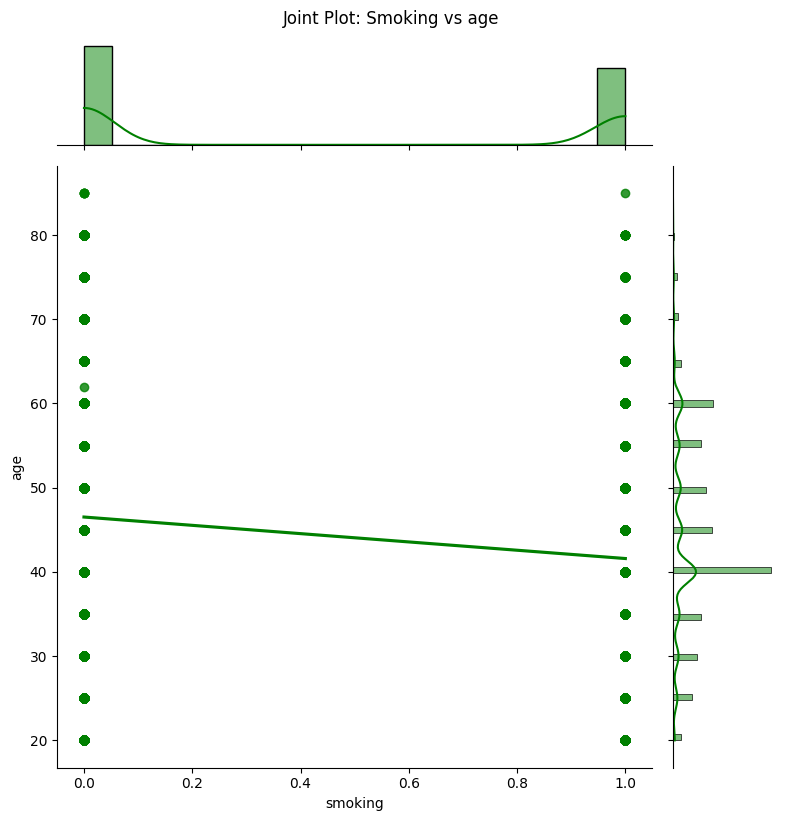

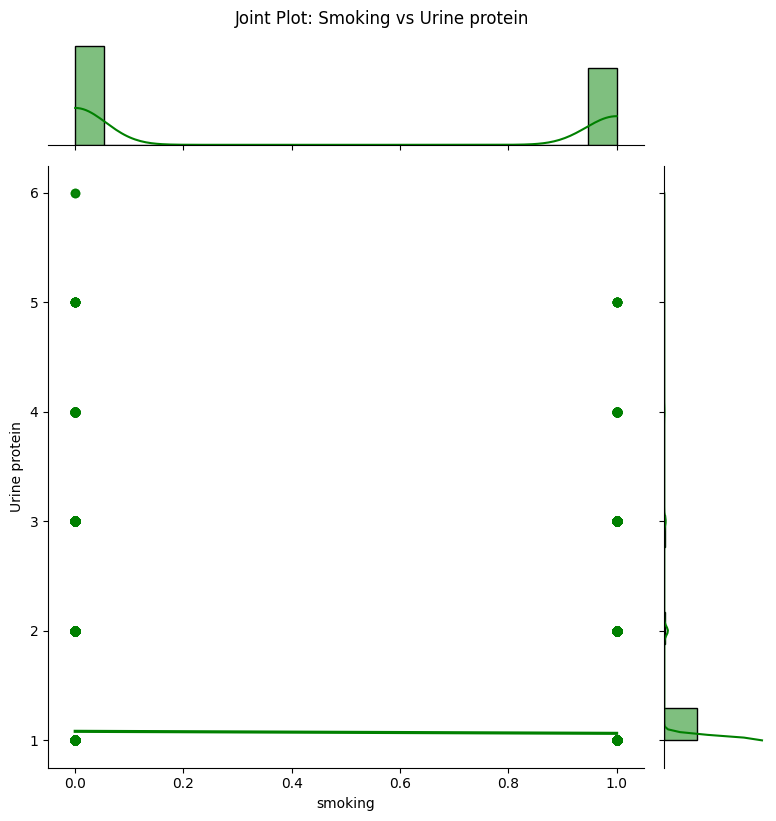

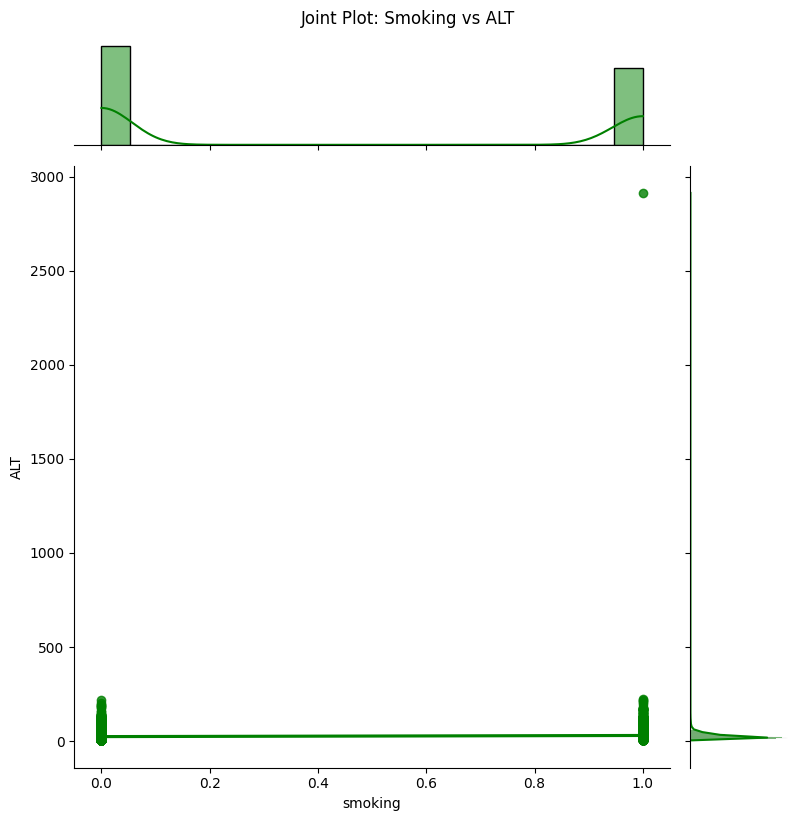

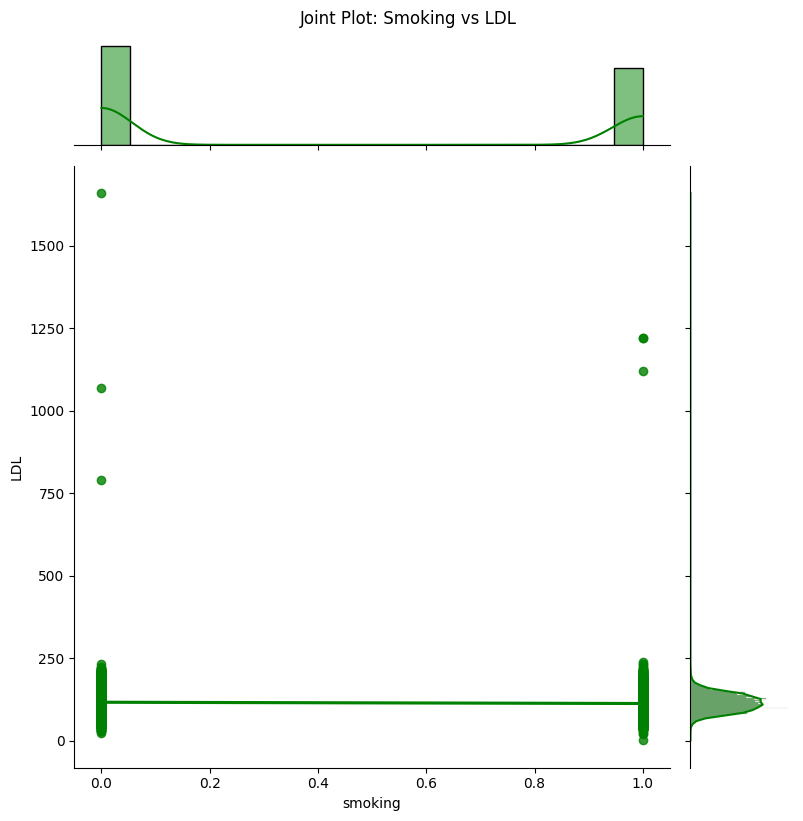

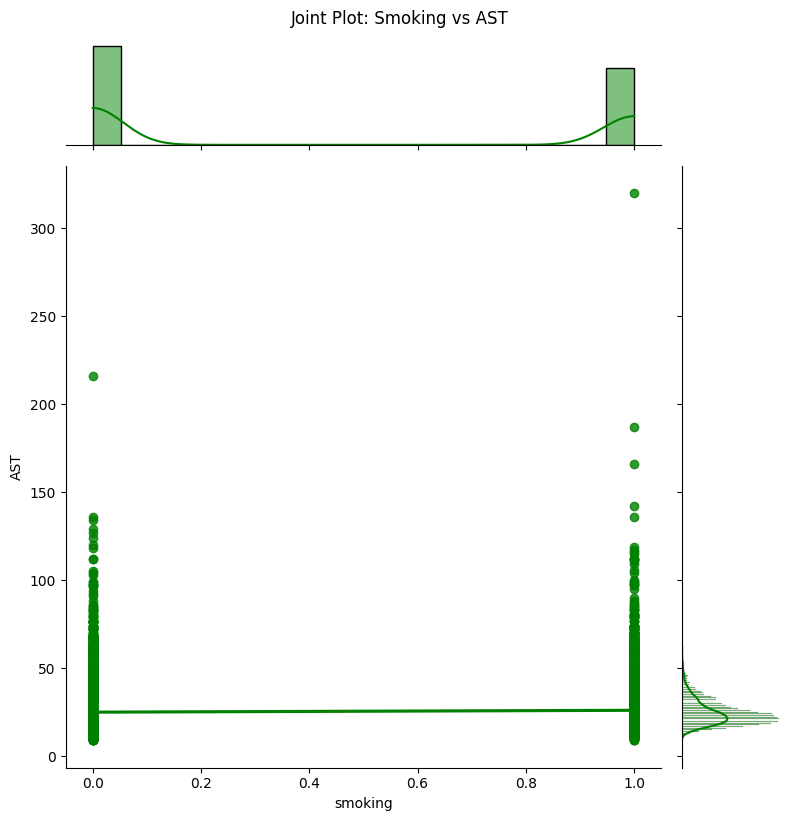

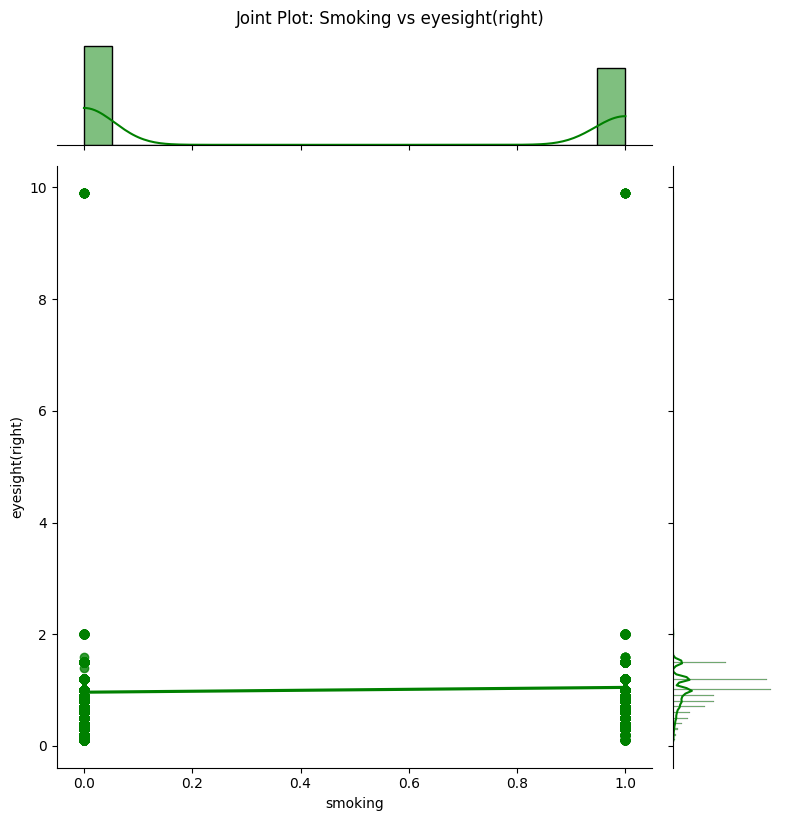

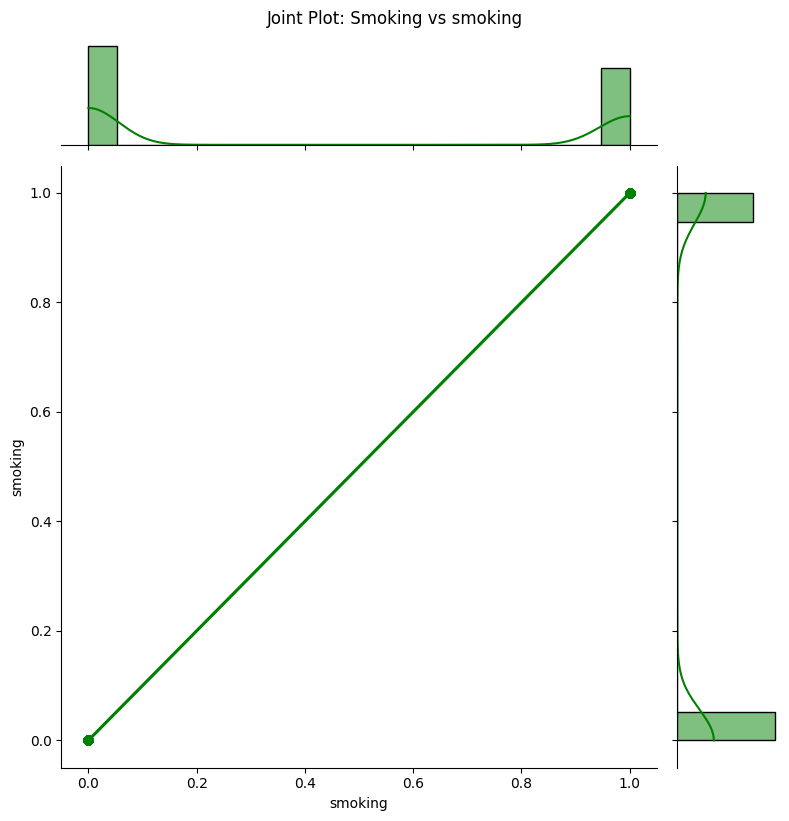

In [ ]:
# for i, col1 in enumerate(numerical_features):
#     for col2 in numerical_features[i+1:]:
#         sns.jointplot(x=col1, y=col2, data=data, kind="reg", height=8, color='green')
#         plt.suptitle(f"Joint Plot: {col1} vs {col2}", y=1.02)
#         plt.show()



for feature in numerical_features:
    joint = sns.jointplot(x='smoking', y=feature, data=data, kind="reg", height=8, color='green')
    joint.fig.suptitle(f"Joint Plot: Smoking vs {feature}", y=1.02)
    plt.show()


## Pair Plot

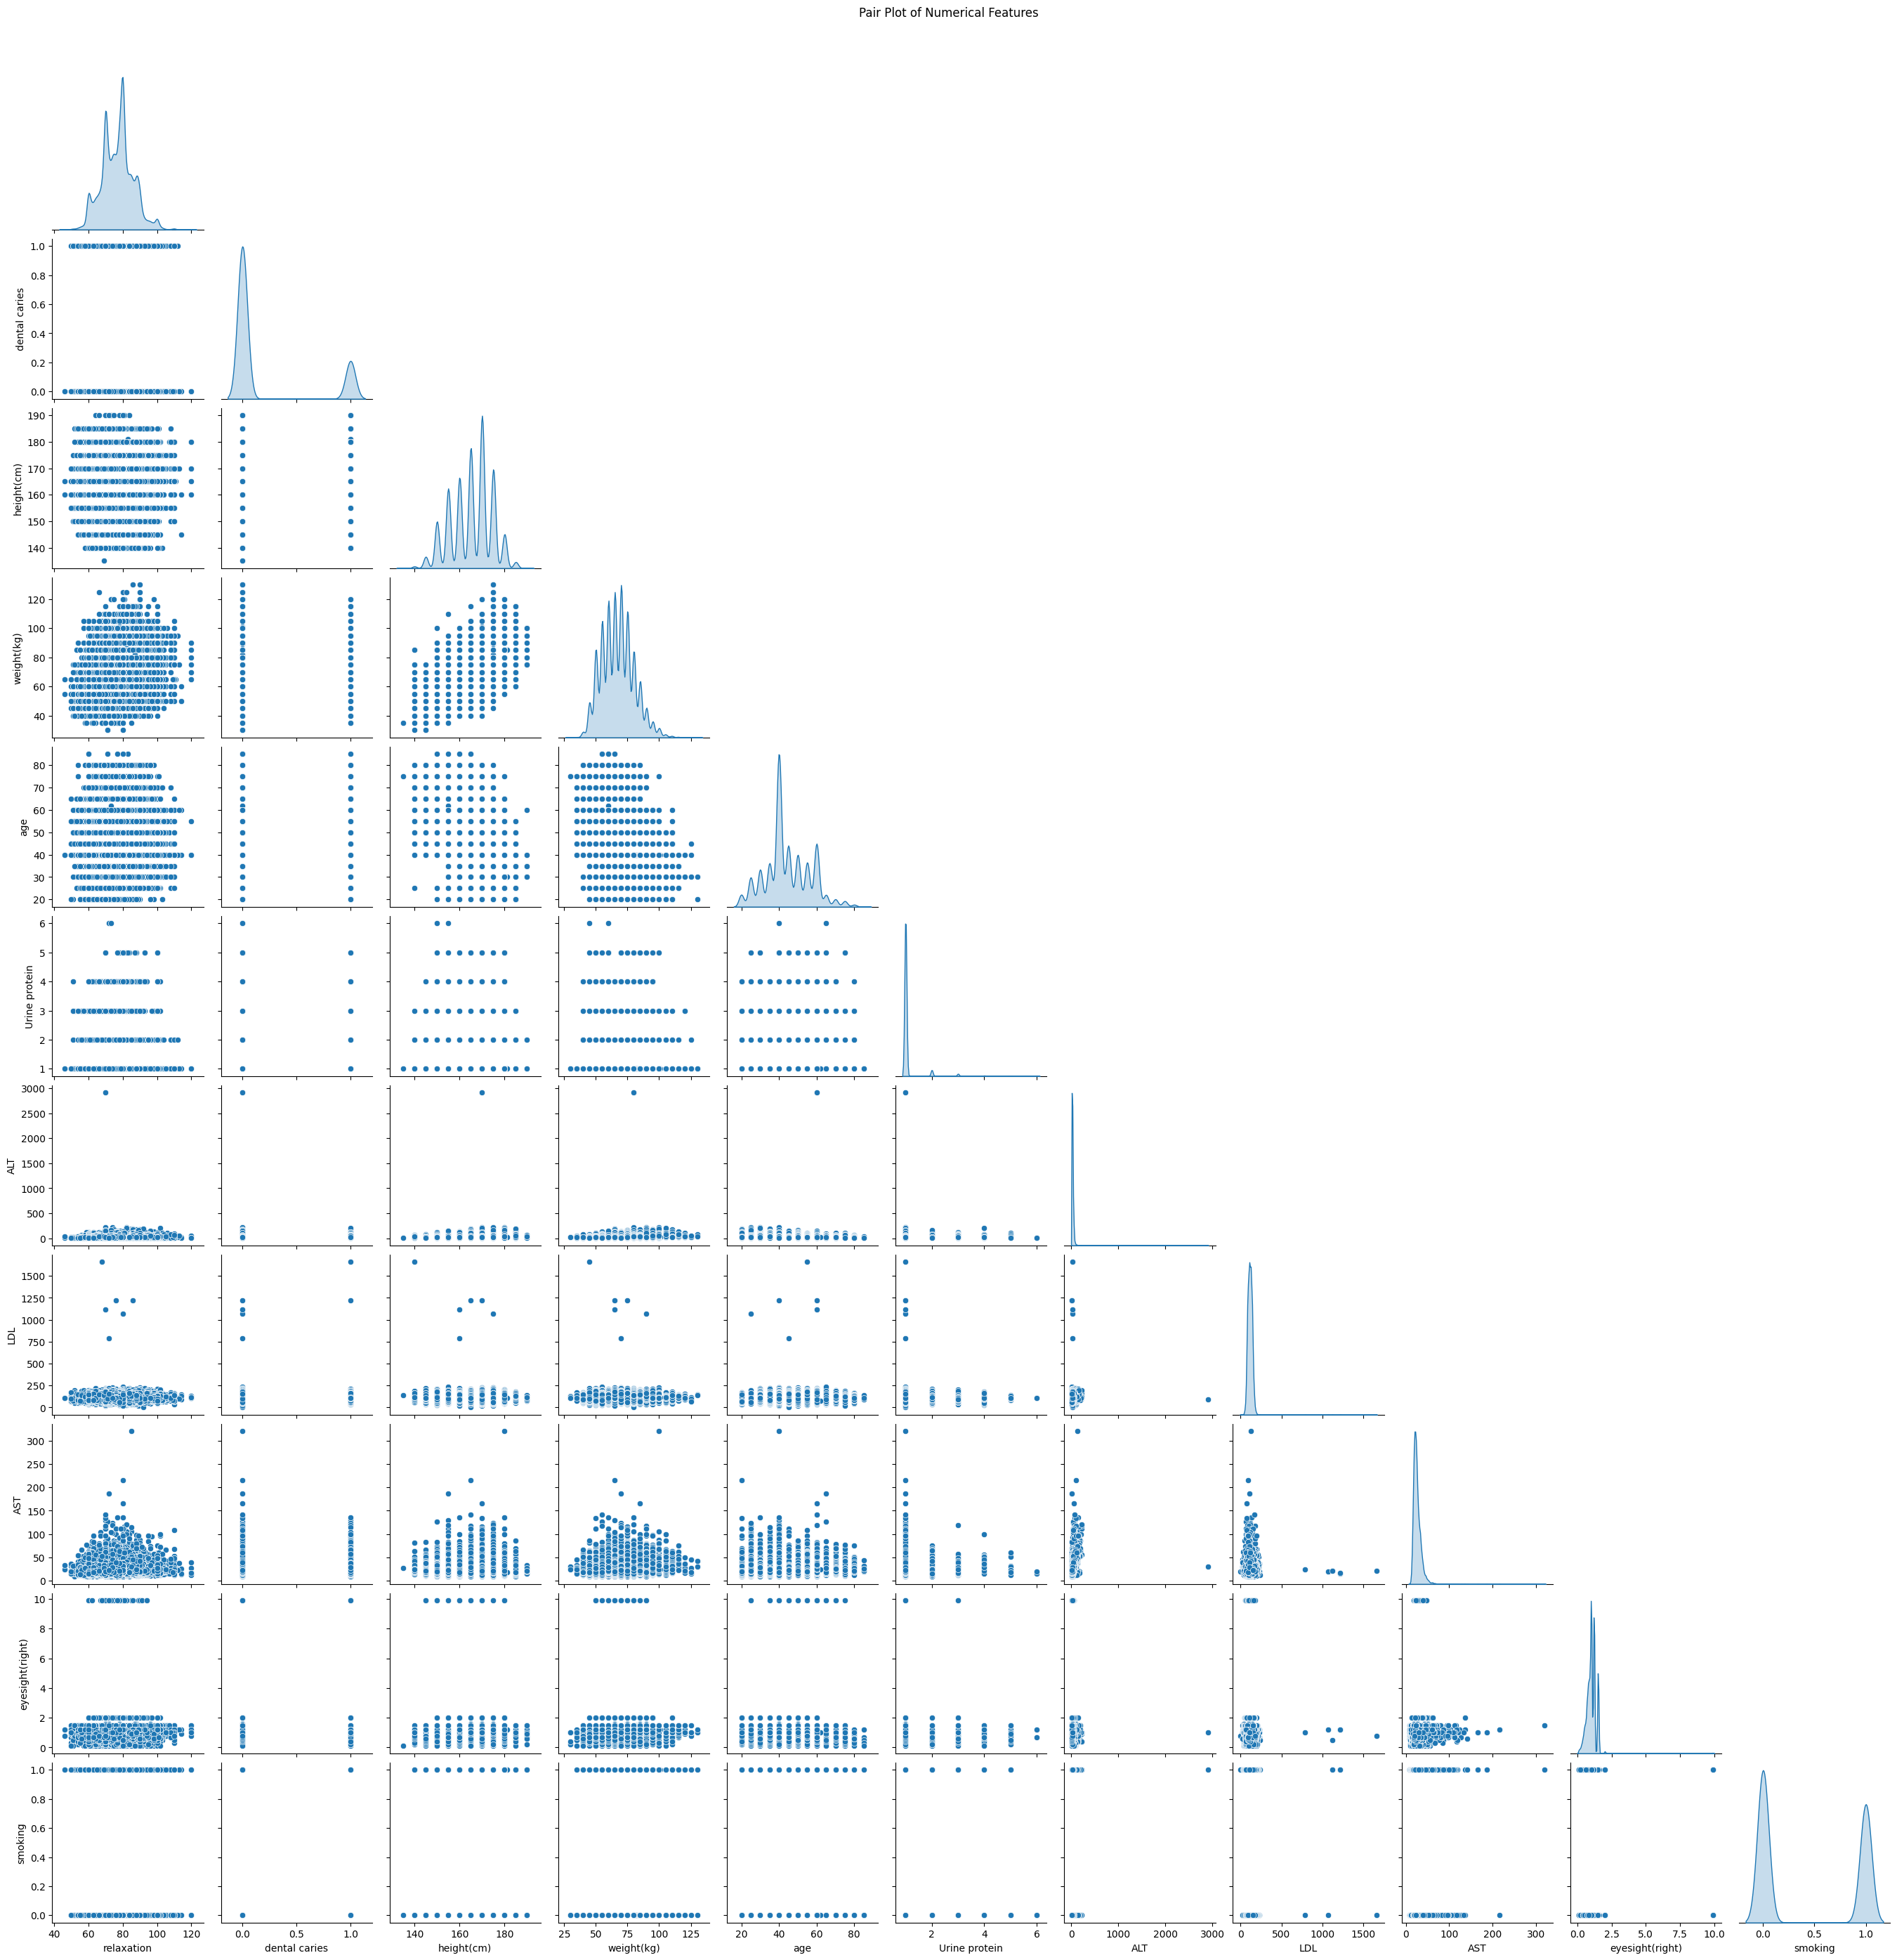

In [ ]:
sns.pairplot(data[numerical_features], diag_kind='kde', corner=True)
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()

# # Include 'smoking' in the pair plot, ensuring it is used in comparisons
# # sns.pairplot(data, vars=numerical_features + ['smoking'], diag_kind='kde', corner=True)
# sns.pairplot(data, vars=list(numerical_features) + ['smoking'], diag_kind='kde', corner=False)
# plt.suptitle("Pair Plot of Numerical Features with Smoking", y=1.02)
# plt.show()


# Multi Variate

## Pair Plot with Hue

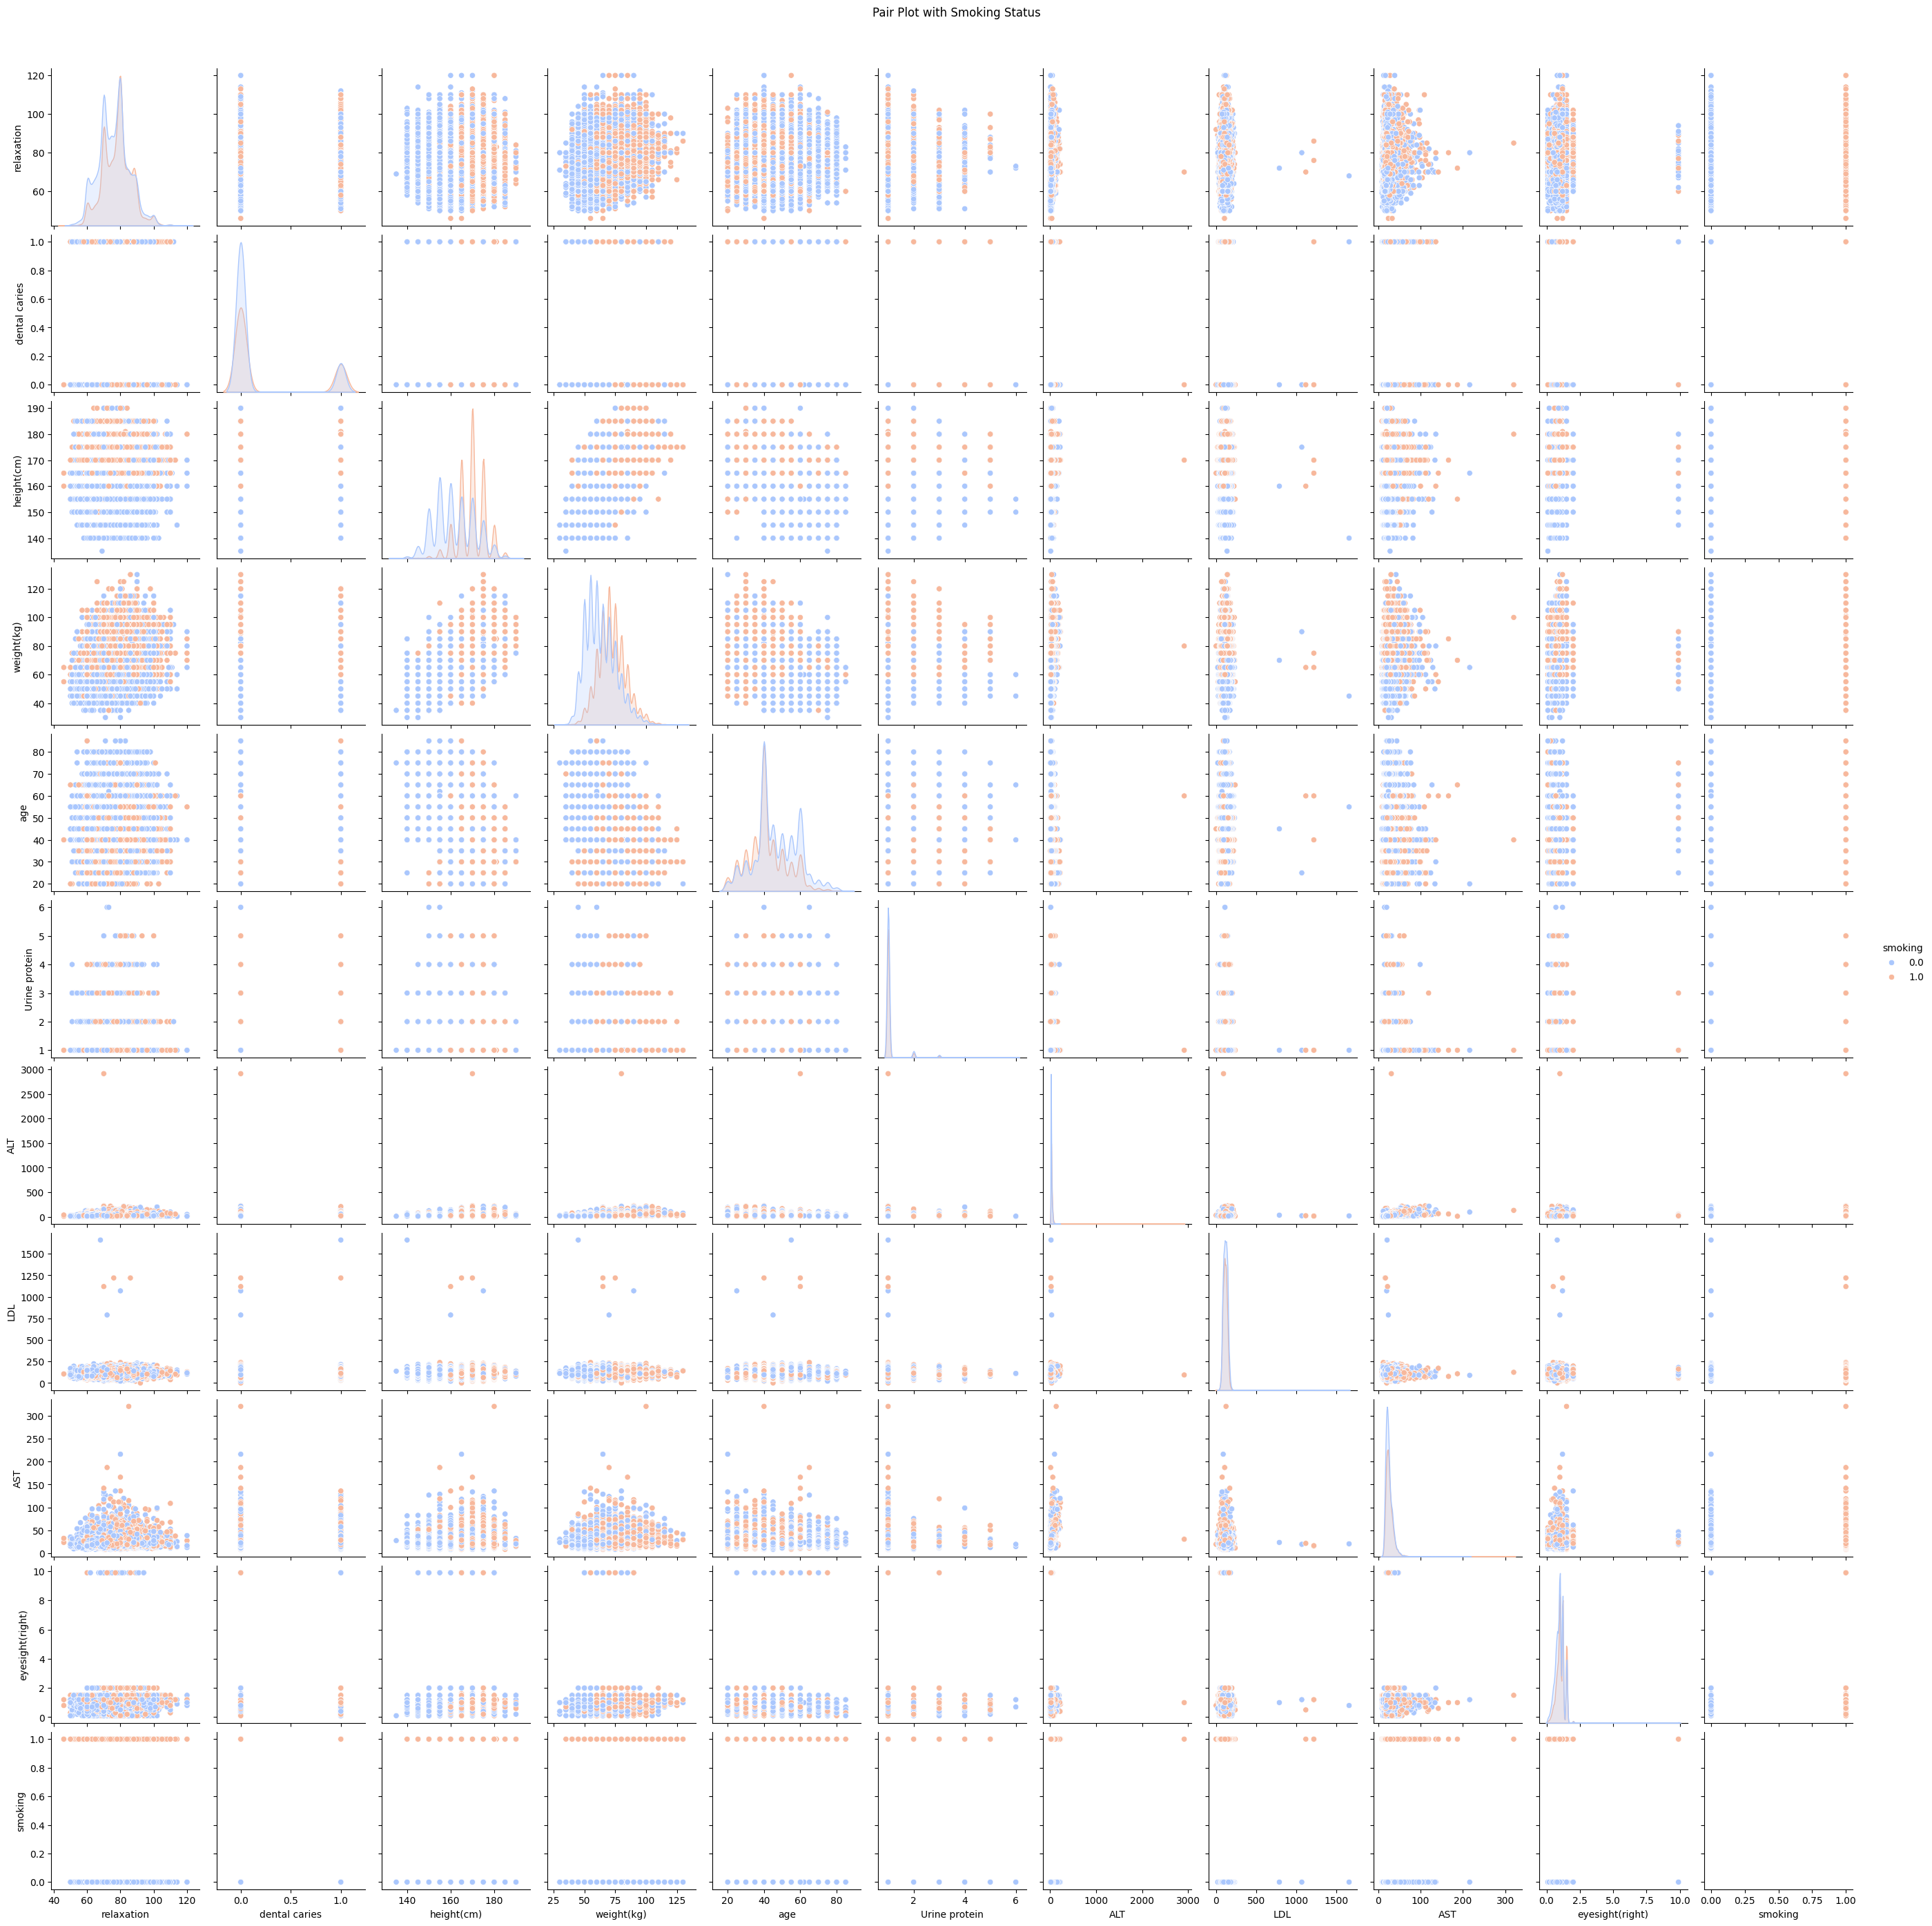

In [ ]:
if 'smoking' in data.columns:
  sns.pairplot(data, vars=numerical_features, hue='smoking', diag_kind='kde', palette='coolwarm')
  plt.suptitle("Pair Plot with Smoking Status", y=1.02)
  plt.show()




## 3D Scatter Plot




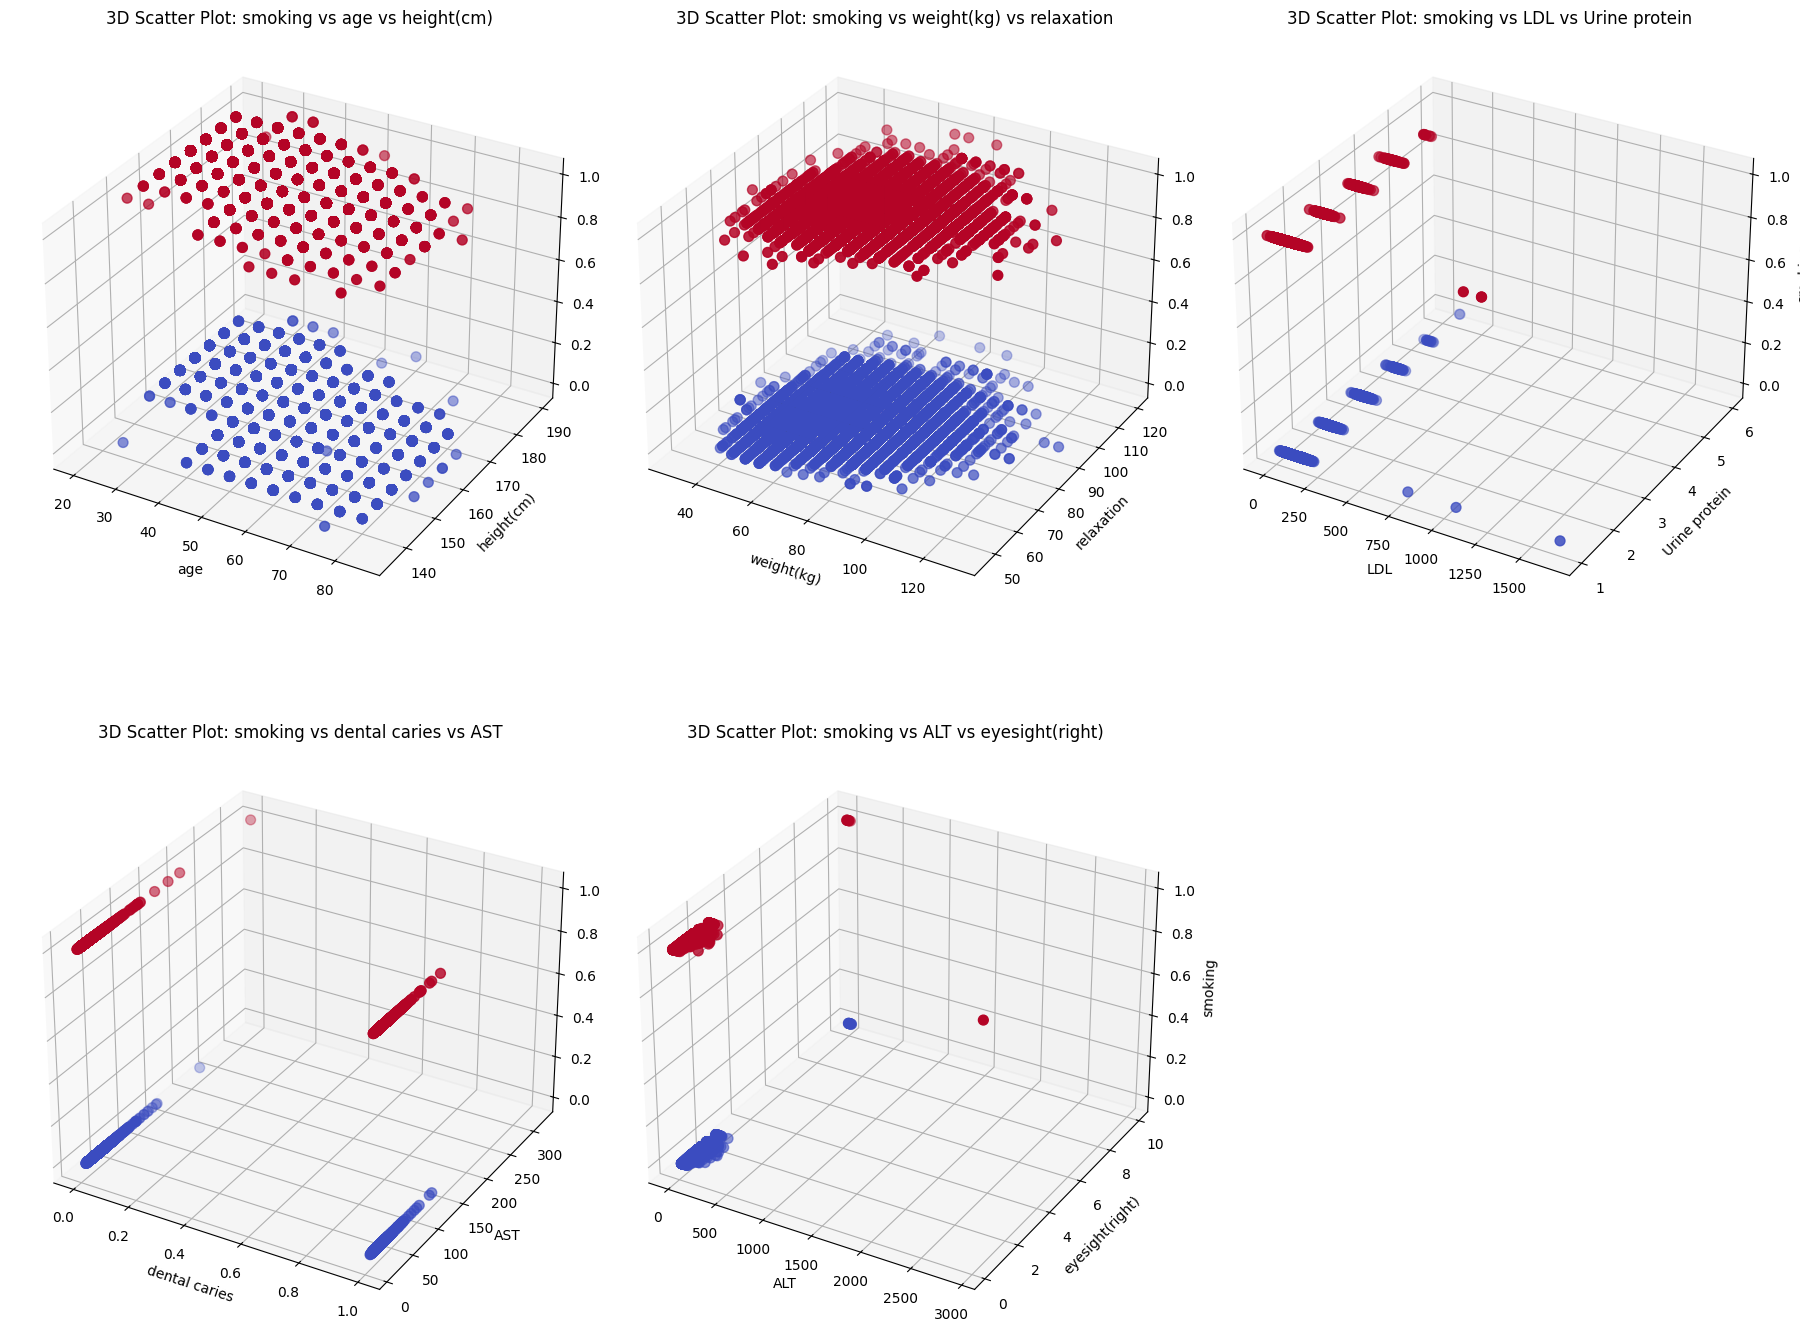

In [ ]:
feature_combinations = [
    ['smoking', 'age', 'height(cm)'],
    ['smoking', 'weight(kg)', 'relaxation'],
    ['smoking', 'LDL', 'Urine protein'],
    ['smoking', 'dental caries', 'AST'],
    ['smoking', 'ALT', 'eyesight(right)']
]

# Set up the figure for multiple subplots
fig = plt.figure(figsize=(18, 15))  # Larger size to fit multiple plots

# Loop through the feature combinations and create a 3D scatter plot for each
for idx, features in enumerate(feature_combinations, 1):
    ax = fig.add_subplot(2, 3, idx, projection='3d')  # 2 rows, 3 columns of plots
    ax.scatter(data[features[1]], data[features[2]], data[features[0]], c=data[features[0]], cmap='coolwarm', s=50)
    ax.set_xlabel(features[1])
    ax.set_ylabel(features[2])
    ax.set_zlabel(features[0])
    ax.set_title(f"3D Scatter Plot: {features[0]} vs {features[1]} vs {features[2]}")

# Adjust layout
plt.tight_layout()
plt.show()

## Principal Component Analysis

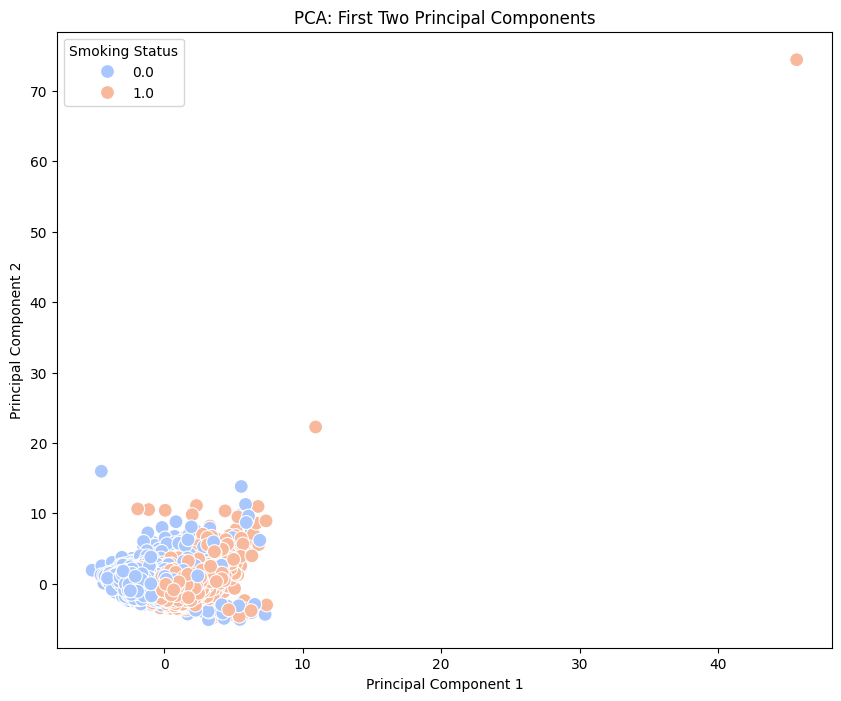

In [ ]:

data_no_nan = data[numerical_features].dropna()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_no_nan)

# Perform PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])

# Add smoking status - ensure you are using the correct index after dropping rows
pca_df['smoking'] = data.loc[data_no_nan.index, 'smoking']

# Plot the results with smoking as the focus
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='smoking', palette='coolwarm', s=100)
plt.title("PCA: First Two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Smoking Status")
plt.show()


## Parallel Coordinates Plot

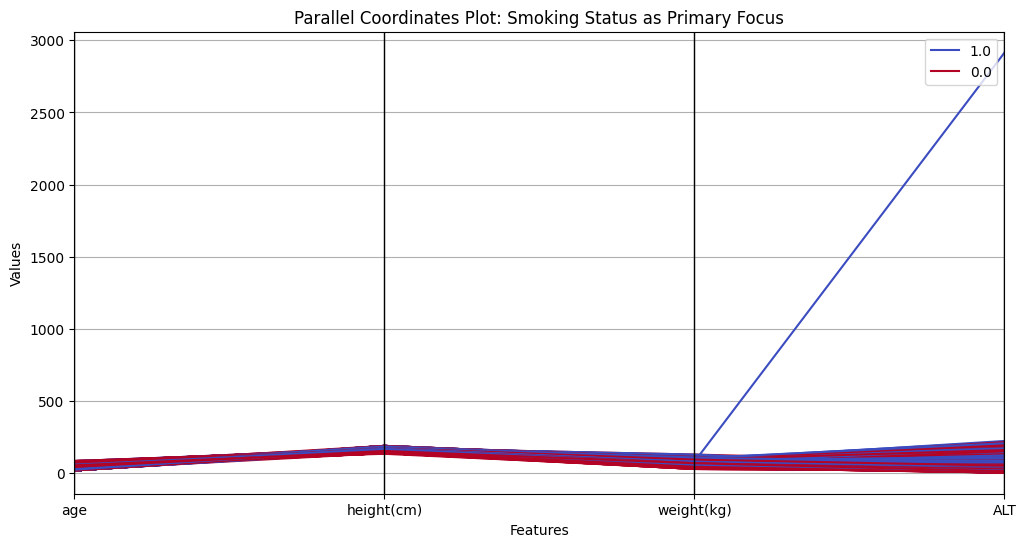

In [ ]:


# # relaxation,dental caries,height(cm),weight(kg),age,Urine protein,ALT,LDL,AST,eyesight(right),smoking
# selected_features = ['age', 'height(cm)', 'weight(kg)', 'ALT']
# parallel_data = data[selected_features + ['smoking']].dropna()
# plt.figure(figsize=(12, 6))
# parallel_coordinates(parallel_data, class_column='smoking', colormap='coolwarm')
# plt.title("Parallel Coordinates Plot")
# plt.xlabel("Features")
# plt.ylabel("Values")
# plt.show()


from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt

# Select the features and include 'smoking'
selected_features = ['age', 'height(cm)', 'weight(kg)', 'ALT']
parallel_data = data[selected_features + ['smoking']].dropna()

# Create the plot
plt.figure(figsize=(12, 6))

# Use 'smoking' as the class column for coloring
parallel_coordinates(parallel_data, class_column='smoking', colormap='coolwarm')

# Title and labels emphasizing smoking
plt.title("Parallel Coordinates Plot: Smoking Status as Primary Focus")
plt.xlabel("Features")
plt.ylabel("Values")

# Display the plot
plt.show()


# ==================================================================